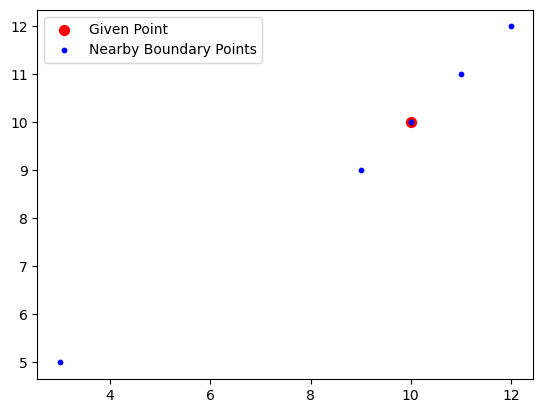

In [7]:
import matplotlib.pyplot as plt
import numpy as np

def plot_nearby_points(boundary_points, given_point, distance_threshold=10):
    """
    Plot boundary points that are within a specified distance from a given point.

    Args:
    - boundary_points: 2D array of boundary points
    - given_point: A point [x, y]
    - distance_threshold: Distance within which to select and plot boundary points
    """

    boundary_points_array = np.array(boundary_points)
    given_point_array = np.array(given_point)

    # Calculate Euclidean distance between the given point and each boundary point
    distances = np.linalg.norm(boundary_points_array - given_point_array, axis=1)

    # Select boundary points within the distance threshold
    nearby_points = boundary_points_array[distances < distance_threshold]

    # Plot the given point
    plt.scatter(given_point[0], given_point[1], color='red', s=50, label='Given Point')

    # Plot the nearby boundary points
    plt.scatter(nearby_points[:, 0], nearby_points[:, 1], color='blue', s=10, label='Nearby Boundary Points')

    plt.legend()
    plt.show()

# Example data
boundary_points = [[1, 1], [2, 3], [3, 5], [9, 9], [10, 10], [11, 11], [12, 12]]
given_point = [10, 10]

plot_nearby_points(boundary_points, given_point, distance_threshold=10)

In [17]:
# Cosine Similarity between cropped edges of images
import cv2
import torch
import torchvision.transforms as transforms
from torchvision.models import resnet18
from scipy.spatial.distance import cosine
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

(<matplotlib.image.AxesImage at 0x7ffa9c25e910>, (224, 224, 3))

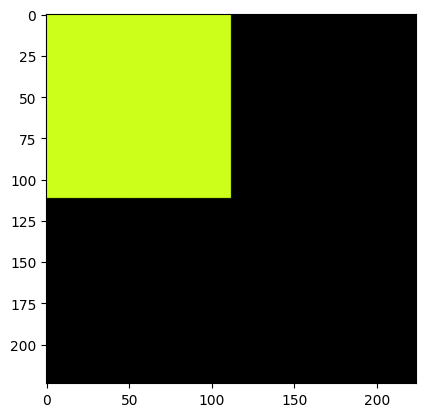

In [15]:
rectangle_img = np.zeros((1080, 1920))
rectangle_img[450:650, 800:1100] = 1
corners = [(450, 800), (450, 1100), (650, 800), (650, 1100)]
for corner in corners:
    img_patch = rectangle_img[corner[0]-112:corner[0]+112, corner[1]-112:corner[1]+112]
    img_patch = np.dstack((img_patch*0.8, img_patch*1, img_patch*0.1))
plt.imshow(img_patch), img_patch.shape

In [22]:
# Load the pretrained ResNet model
model = resnet18(pretrained=True)
model = torch.nn.Sequential(*list(model.children())[:-1])
model.eval()

# Load an image of a rectangle
image = rectangle_img

# Define the corners' coordinates
corners = [(450, 800), (450, 1100), (650, 800), (650, 1100)]

# Preprocess the images and pass through the ResNet model
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

corner_features = []
with torch.no_grad():
    for corner in corners:
        # Crop the corner from the image
        corner_img = image[corner[0]-112:corner[0]+112, corner[1]-112:corner[1]+112]
        corner_img = np.dstack((corner_img*0.8, corner_img*1, corner_img*0.1))
        corner_img = Image.fromarray(np.uint8(corner_img*255))
        corner_img = transform(corner_img).unsqueeze(0)
        
        # Forward pass through ResNet
        corner_feature = model(corner_img)
        corner_features.append(corner_feature.squeeze())

# Compute cosine similarity scores
similarity_matrix = torch.zeros((4, 4))
for i in range(4):
    for j in range(4):
        similarity_matrix[i, j] = 1 - cosine(corner_features[i], corner_features[j])

print(similarity_matrix)

tensor([[1.0000, 0.9576, 0.9331, 0.9239],
        [0.9576, 1.0000, 0.9223, 0.9386],
        [0.9331, 0.9223, 1.0000, 0.9707],
        [0.9239, 0.9386, 0.9707, 1.0000]])
